In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from datetime import datetime, date
import pandas_datareader.data as web
import statistics as stats
import mplfinance as mpf
import os
import sys
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS
import seaborn as sns
sys.path.append('./working_files')
from working_files.functions import *


In [28]:
# general_info 
year = int(2025)

apple_info, apple = finding_stock_info('AAPL', year)
google_info, google = finding_stock_info('GOOGL',year)
dfs_info, dfs = finding_stock_info('DFS',year)
star_info, starbucks = finding_stock_info('SBUX',year)
spy_info, spy = finding_stock_info('SPY',year)
netflix_info, netflix = finding_stock_info('NFLX',year)
qqq_info, qqq = finding_stock_info('QQQ',year)
vix_info, vix = finding_stock_info('^VIX',year)
meta_info, meta = finding_stock_info('META',year)
nvidia_info, nvidia = finding_stock_info('NVDA',year)
coke_info, coke = finding_stock_info('KO',year)
voo_info, voo = finding_stock_info('VOO', year)
amd_info, amd = finding_stock_info('AMD' ,year)

# this is necessary for on-going work and insights
apple = adding_relevant_columns(apple)
google = adding_relevant_columns(google)
discover = adding_relevant_columns(dfs)
qqq = adding_relevant_columns(qqq)
starbucks = adding_relevant_columns(starbucks)
netflix = adding_relevant_columns(netflix)
spy = adding_relevant_columns(spy)
vix = adding_relevant_columns(vix)
meta = adding_relevant_columns(meta)
nvidia = adding_relevant_columns(nvidia)
coke = adding_relevant_columns(coke)
voo = adding_relevant_columns(voo)
amd = adding_relevant_columns(amd)

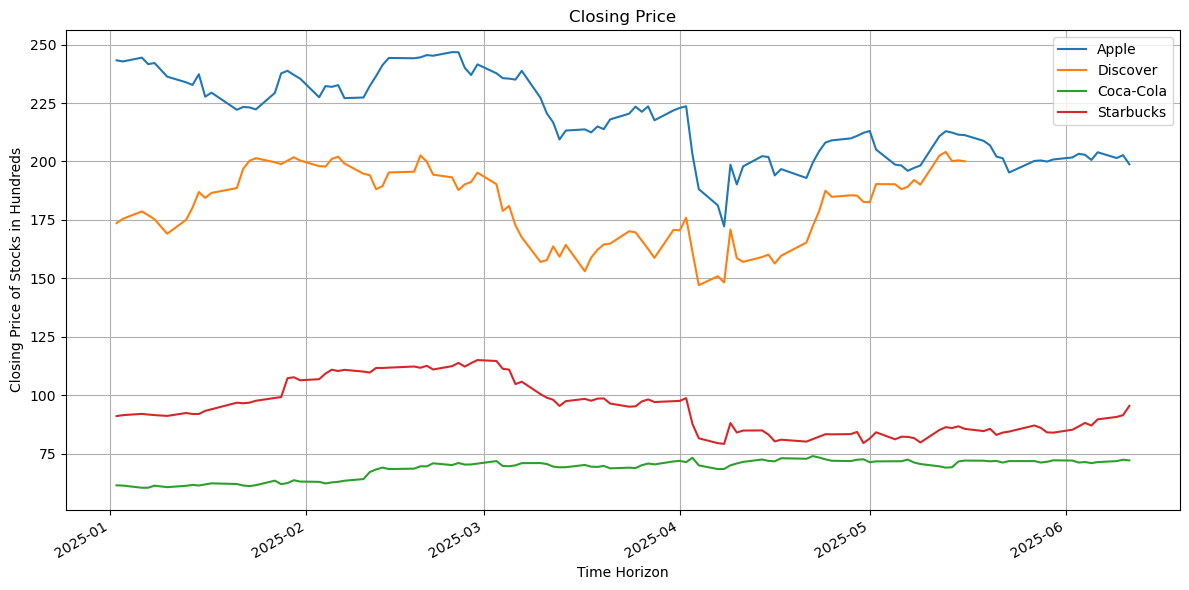

In [29]:
closing_price(apple, discover, coke, starbucks, 
               labels = ['Apple','Discover','Coca-Cola','Starbucks'])

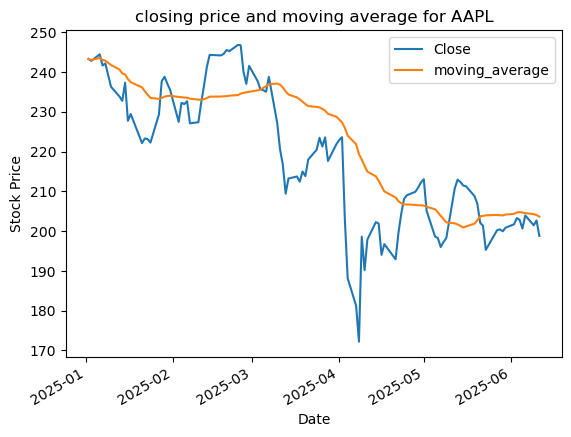

In [30]:
tracking(apple, 'AAPL')

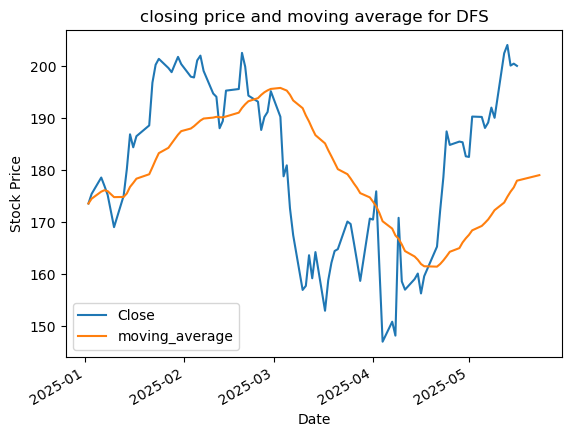

In [31]:
tracking(discover,'DFS')

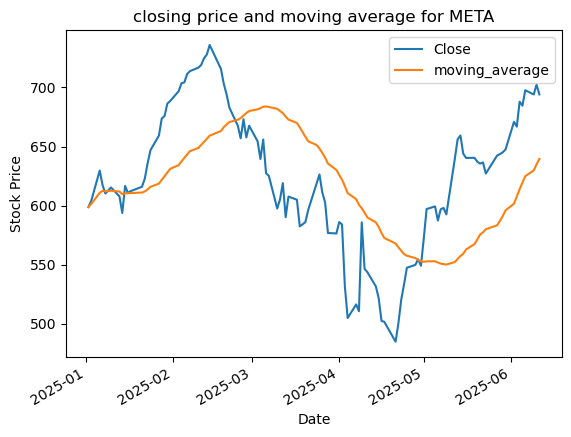

In [32]:
tracking(meta,'META')

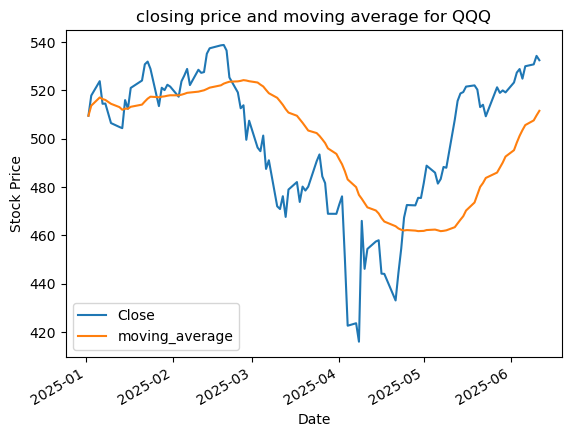

In [33]:
tracking(qqq, 'QQQ')

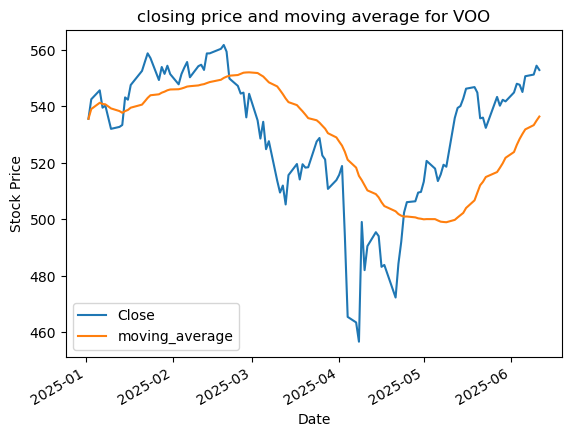

In [34]:
tracking(voo, 'VOO')

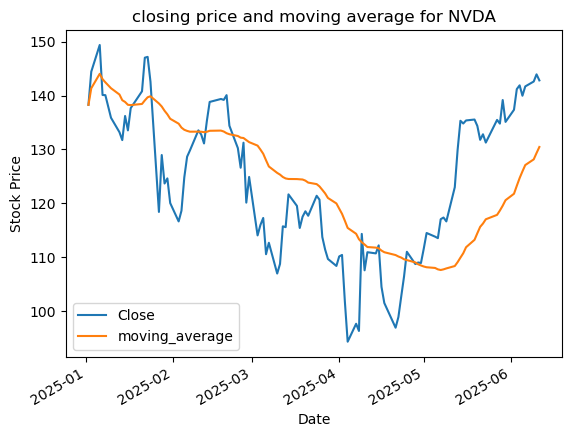

In [35]:
tracking(nvidia, 'NVDA')

In [36]:
sample_data = [apple ,amd, meta, nvidia, google]

sample_names = ['Apple', 'AMD', 'META','NVIDIA','GOOGLE']

df = pd.concat([ df['Close'] for df in sample_data], axis = 1)
df.columns = sample_names
df.head(1)



,Apple,AMD,META,NVIDIA,GOOGLE
Date,,,,,
2025-01-02 00:00:00-05:00,243.263199,120.629997,598.707336,138.287674,188.983292


In [51]:
closing = np.array(apple['Close'])
r_i = np.log(closing[1:] / closing[:-1])
r_i_mean = np.mean(r_i)
n = len(r_i)
summation = np.sum((r_i - r_i_mean) ** 2)
volatility = np.sqrt(summation / (n - 1)) * 100
apple['Historical Volatility'] = volatility
columns = ['volatility', 'Volatility']


apple.sample(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,market_cap,daily_return,moving_average,ema,Historical Volatility
Date,,,,,,,,,,,,
2025-04-30 00:00:00-04:00,209.025904,213.300298,206.399343,212.221710,52286500,0.0,0.0,1.092923e+10,0.610769,206.474575,213.368769,2.66489
2025-01-29 00:00:00-05:00,233.556586,239.282778,233.446850,238.783981,45486100,0.0,0.0,1.062358e+10,0.461680,233.777732,237.924504,2.66489
2025-04-07 00:00:00-04:00,176.967935,193.895735,174.391312,181.222366,160466300,0.0,0.0,2.839739e+10,-3.673424,221.822780,224.058894,2.66489
2025-06-09 00:00:00-04:00,204.389999,206.000000,200.020004,201.449997,72862600,0.0,0.0,1.489239e+10,-1.211260,204.261850,206.620624,2.66489
2025-03-26 00:00:00-04:00,223.217271,224.725303,220.181259,221.239868,34466100,0.0,0.0,7.693429e+09,-0.992183,230.705464,229.758195,2.66489


In [ ]:
def calculating_historical_vol(stock):